In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lrutils
from lrutils import generate_data, plot_abline
%matplotlib inline


# Multivariate Linear Regression

## Quick refresher

The general form of a multivariate regression is

$$
y \approx w_{0} +
w_{1} x_{1} + w_{2} x_{2} + \cdots + w_{p}x_p
$$

where $y$ is the response vector and $x_{1},…,x_{p}$ are the features (covariates). 
Each of the predictor variables must be numerical. 
The parameters (coefficients) $w_0,…,w_p$ correspond to the *effect* of each feature after taking account of the effect of all other features in the model. 

It is convenient to write this in matrix form where all the values of the forecast variable are given in a single equation. 

$$
X = \left[\begin{matrix} 1 & x_{1,1} & x_{2,1} & \dots & x_{p,1}\\ 1 & x_{1,2} & x_{2,2} & \dots & x_{p,2}\\ \vdots & \vdots & \vdots & & \vdots\\ 1 & x_{1,n} & x_{2,n} & \dots & x_{p,n} \end{matrix}\right].
$$

The first column correspond to the intercept ($w_0$) which does not multiply a feature.

The problem then becomes one of finding $w\in\mathbb R^p$ such that $y\approx Xw$ or such that

$$ L(w) \quad\!\!=\quad\!\! \|y - Xw\|_2^2 $$

is minimized.

----------------------

## Exercises

In what follows, we will make use of the following material, covered in Module 1:

* Python functions
* Linear algebra: norms, and matrix products.
* Optimization (gradient descent).



We will work on a simple dataset with two variables $x$ and $y$. Have a look at the data (e.g. using a scatterplot).

In [2]:
# load the data
np.random.seed(1000)
x, y = generate_data(200)

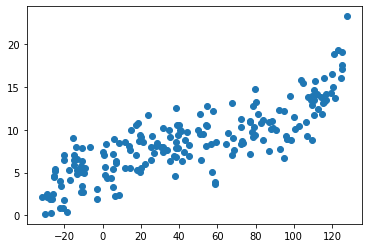

In [3]:
plt.scatter(x, y);

##### Step 1: Initialise
1\. First initialise $w$ to any array of size $2$.

2\. As explained above, the convention in linear regression is to remove the constant term from the model and make the first column of the data matrix a column of 1s.

Using `numpy`, concatenate a column of ones to the data matrix $X$

$ X \leftarrow [\mathbf{1}\,\,\, X] $

<br>
<br>
Hints for part (2):
* First construct a $200 \times 1$ array of ones. See: `np.ones`
* Then concatenate the columns together using `np.hstack`
* Both these functions take an argument of tuples, so you'll need to use two sets of brackets.




In [9]:
w = ...

X = ...

w = np.array([0., 0.])

X = np.hstack((np.ones((200, 1)), x))


##### Step 2: Predicted Values
Create a function that outputs the predicted values $\hat{y}$ given the current value of $w$.

Recall that $\hat{y} = Xw$

In [10]:
def predicted_values(w, X):
    # calculate y_pred
    y_pred = X @ w
    
    return y_pred

##### Step 3: Loss Function
Create a function that calulates the current loss of our predictions $\hat{y} = Xw$ using the squared $L_2$ norm.

In [11]:
def loss_function(w, X, y):
    # calculate the residual r = y_hat - y
    y_hat = predicted_values(w, X)
    r = y - y_hat
    
    
    # calculate the squared norm, or the sum of squares of `r`.
    # You can code this directly, or use the norm functions
    # discussed in module 1.
    loss = np.linalg.norm(r)**2
    
    return loss

##### Step 4: Gradient
Recall that the gradient of our function is (after some algebraic manipulation):

$$ \nabla_w L \quad\!\!=\quad\!\! -X^T (y - Xw) \quad\!\!=\quad\!\! -X^T r $$

for residuals $r$. Create a function that returns the gradient for a given value of $w$ (and $X$ and $y$).


In [12]:
def gradient(w, X, y):
    ...
    y_hat = predicted_values(w, X)
    r = y - y_hat
    grad = -X.T @ r
    return grad

##### Step 5: Optimise!
Using the SimpleGD function from Module 1, perform 1000 steps of gradient descent and plot the evolution of the function values returned.

We've included a slightly modified version of the gradient descent function as we are now performing optimisation of a *vector* quantity rather than a scalar quantity, and we will just return the final value of the variable rather than all the intermediate ones.

We recommend using a very small step size to begin with: try $\gamma = 10^{-6}$.

Hint: if your loss increases towards $\infty$, try resetting $w$ and reducing the stepsize.

<span style="color:red"><b>Warning: If you have generated data with n > 200, you will need to decrease the step size from our recommendation, perhaps significantly.</b></span>

In [13]:
# Modified simpleGD function
def simpleGD(x0, f, g, gamma, nr_steps):
    history = np.zeros(nr_steps+1)
    history[0] = f(x0)
    x = x0
    for ii in range(nr_steps):
        # this formulation amounts to writing x = x - stepsize*g(x)
        x -= gamma*g(x)
        history[ii+1] = f(x)
    return x, history

In [14]:
# create versions of your loss and gradient functions that only require `w` as an input
# (hint: you might want to use a lambda function.)

loss_Xy = lambda w: loss_function(w, X, y)
gradient_Xy = lambda w: gradient(w, X, y)


In [16]:
# Perform gradient descent on your loss function, 
# w, history = simpleGD(...
# w = np.zeros(2)    # in case step size is too large and loss explodes
w, history = simpleGD(w, loss_Xy, gradient_Xy, 1e-6, 1000)


##### Step 6: Optimisation Diagnostics
Plot the history of your loss over your iterates. 
* Does it decrease or increase? 
    * If increasing, reset your $w$ and optimize again with a smaller step size.
    * If this doesn't fix the issue, you may have a bug in your code.
* How quickly does it decrease?
* Does it look like it's converging?
* [**Question**] How might you speed up the convergence?

Hint: be *very* careful when increasing the step size!

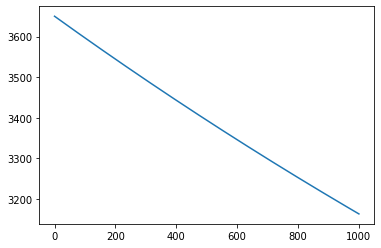

In [17]:
plt.plot(history)


##### Step 7: Review the model fit
Plot your predictions against the data.

* Create a scatterplot of the original data points (see above for an example).
* Using the below function, draw the regression fit.
* How well does the regression line fit the data?
* Is this a problem with the optimisation or the model? Try performing a few '000s more iterations.

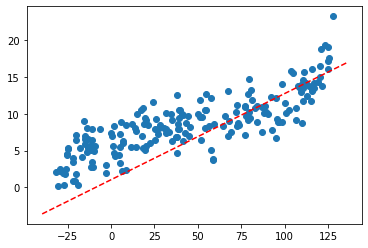

In [18]:
plt.scatter(x, y)
plot_abline(w[1], w[0], '--', color='red')
# plot_regression_line(w)


All being well, you should have a line fitting your data reasonably well. If so, congratulations, you've coded up your first machine learning algorithm!

Notice that while we've applied this algorithm to a 2D dataset, in principle it can be applied to a dataset of any dimension. If you have time, consider trying again with the data generated from:

```python
np.random.seed(3)
x, y = lrutils.generate_data3d(200)
```
Be aware that your `x` variable now has *two* columns.